In [1]:
#Importing all the libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression


In [2]:
#Loading the dataset

data = pd.read_csv('Food_Inspections.csv')

In [3]:
data.head()

,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Results,Violations,Latitude,Longitude,Location
0,2079132,MARRIOT MARQUIS CHICAGO,MARRIOT MARQUIS CHICAGO,2517328.0,Restaurant,Risk 1 (High),2121 S PRAIRIE AVE,CHICAGO,IL,60616.0,08/28/2017,License,Pass,NaN,41.853651,-87.620534,"(41.853650885040594, -87.62053358114167)"
1,2079129,JET'S PIZZA,JET'S PIZZA,2522268.0,Restaurant,Risk 2 (Medium),1025 W MADISON ST,CHICAGO,IL,60607.0,08/28/2017,License,Not Ready,NaN,41.881572,-87.653052,"(41.88157249576794, -87.65305233593274)"
2,2079125,ROOM 1520,ROOM 1520,2446638.0,Special Event,Risk 3 (Low),301 N JUSTINE ST,CHICAGO,IL,60607.0,08/28/2017,License Re-Inspection,Not Ready,8. SANITIZING RINSE FOR EQUIPMENT AND UTENSILS...,41.886577,-87.665328,"(41.88657652150854, -87.66532812140231)"
3,2079123,MARRIOT MARQUIS CHICAGO,MARRIOT MARQUIS CHICAGO,2517338.0,Restaurant,Risk 1 (High),2121 S PRAIRIE AVE,CHICAGO,IL,60616.0,08/28/2017,License,Pass,"35. WALLS, CEILINGS, ATTACHED EQUIPMENT CONSTR...",41.853651,-87.620534,"(41.853650885040594, -87.62053358114167)"
4,2079105,CHARTWELLS,CICS WEST BELDEN CAMPUS,2549079.0,CHARTER SCHOOL,Risk 1 (High),2245 N MCVICKER AVE,CHICAGO,IL,60639.0,08/28/2017,License Re-Inspection,Pass,18. NO EVIDENCE OF RODENT OR INSECT OUTER OPEN...,41.921675,-87.776711,"(41.921675488910864, -87.7767113569357)"


In [85]:
data.shape

(153810, 6)

In [4]:
#Describing the data
data.describe()

,Inspection ID,License #,Zip,Latitude,Longitude
count,1.538100e+05,1.537950e+05,153712.000000,153266.000000,153266.000000
mean,1.238655e+06,1.517483e+06,60629.004795,41.879852,-87.676471
std,5.582027e+05,8.799955e+05,22.605480,0.081235,0.058835
min,4.424700e+04,0.000000e+00,60007.000000,41.644670,-87.914428
25%,6.643452e+05,1.139359e+06,60614.000000,41.829990,-87.708000
50%,1.361446e+06,1.914680e+06,60625.000000,41.891405,-87.666901
75%,1.578391e+06,2.153526e+06,60643.000000,41.939409,-87.634603
max,2.079219e+06,9.999999e+06,60827.000000,42.021064,-87.525094


In [5]:
#Information of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153810 entries, 0 to 153809
Data columns (total 17 columns):
Inspection ID      153810 non-null int64
DBA Name           153810 non-null object
AKA Name           151267 non-null object
License #          153795 non-null float64
Facility Type      149250 non-null object
Risk               153744 non-null object
Address            153810 non-null object
City               153651 non-null object
State              153802 non-null object
Zip                153712 non-null float64
Inspection Date    153810 non-null object
Inspection Type    153809 non-null object
Results            153810 non-null object
Violations         123012 non-null object
Latitude           153266 non-null float64
Longitude          153266 non-null float64
Location           153266 non-null object
dtypes: float64(4), int64(1), object(12)
memory usage: 19.9+ MB


In [6]:
#Checking the null values
data.isnull().sum()

Inspection ID          0
DBA Name               0
AKA Name            2543
License #             15
Facility Type       4560
Risk                  66
Address                0
City                 159
State                  8
Zip                   98
Inspection Date        0
Inspection Type        1
Results                0
Violations         30798
Latitude             544
Longitude            544
Location             544
dtype: int64

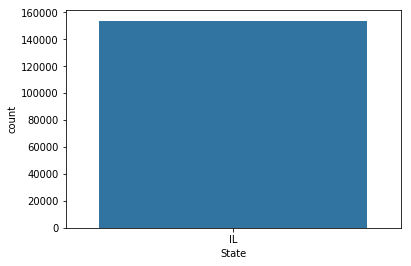

In [7]:
#There is just one state
sns.countplot(data['State'])

In [8]:
#Imputing 'IL' to state
data['State'].fillna(value = 'IL',inplace =True)

In [9]:
#Checking the city missing values, since all the cities are from IL state
#Since most the cities are chicago, imputing missing values with Chicago in city column
data['City'].value_counts()

CHICAGO                 153090
Chicago                    258
chicago                     77
CCHICAGO                    39
SCHAUMBURG                  18
MAYWOOD                     14
ELK GROVE VILLAGE           12
CHicago                     10
INACTIVE                     8
SKOKIE                       8
CHESTNUT STREET              8
EVANSTON                     7
CHARLES A HAYES              6
CHCHICAGO                    6
CHICAGOCHICAGO               6
CICERO                       6
ELMHURST                     5
WORTH                        5
OAK PARK                     4
SUMMIT                       4
CALUMET CITY                 4
CHCICAGO                     3
NILES NILES                  3
EAST HAZEL CREST             3
SCHILLER PARK                3
ALSIP                        3
CHICAGOI                     3
BEDFORD PARK                 2
312CHICAGO                   2
BANNOCKBURNDEERFIELD         2
CHICAGO HEIGHTS              2
NAPERVILLE                   2
STREAMWO

In [10]:
data['City'].fillna(value = 'CHICAGO',inplace=True)

In [11]:
#Making the cities unifrom as chicago is misspelled
data['City'].replace(to_replace = ['Chicago','chicago','CCHICAGO','CHicago','CHICAGOCHICAGO','CHCHICAGO','CHICAGOI','CHCICAGO','312CHICAGO','CHICAGO HEIGHTS'],value='CHICAGO',inplace=True)
data['City'].replace(to_replace = ['alsip','Maywood','OOLYMPIA FIELDS'],value=['ALSIP','MAYWOOD','OLYMPIA FIELDS'],inplace=True)

In [12]:
data['City'].value_counts()

CHICAGO                 153655
SCHAUMBURG                  18
MAYWOOD                     15
ELK GROVE VILLAGE           12
INACTIVE                     8
SKOKIE                       8
CHESTNUT STREET              8
EVANSTON                     7
CHARLES A HAYES              6
CICERO                       6
ELMHURST                     5
WORTH                        5
SUMMIT                       4
ALSIP                        4
CALUMET CITY                 4
OAK PARK                     4
EAST HAZEL CREST             3
NILES NILES                  3
SCHILLER PARK                3
BANNOCKBURNDEERFIELD         2
BERWYN                       2
NAPERVILLE                   2
BLUE ISLAND                  2
OLYMPIA FIELDS               2
BEDFORD PARK                 2
STREAMWOOD                   2
BURNHAM                      1
LAKE BLUFF                   1
GLENCOE                      1
LOMBARD                      1
TINLEY PARK                  1
LAKE ZURICH                  1
WESTMONT

In [13]:
#Printing other cities other than CHICAGO as 'OTHER CITIES'
for i in range(0,len(data['City'])):
    if data.loc[i,'City']!='CHICAGO':
        data.loc[i,'City']='OTHER CITIES'

In [14]:
#Describing the Latitude feature
data['Latitude'].describe()

count    153266.000000
mean         41.879852
std           0.081235
min          41.644670
25%          41.829990
50%          41.891405
75%          41.939409
max          42.021064
Name: Latitude, dtype: float64

In [15]:
#Filling the Latitude value with median

data['Latitude'].fillna(value=41.891405,inplace=True)

In [16]:
#Describing the longitude feature
data['Longitude'].describe()

count    153266.000000
mean        -87.676471
std           0.058835
min         -87.914428
25%         -87.708000
50%         -87.666901
75%         -87.634603
max         -87.525094
Name: Longitude, dtype: float64

In [17]:
#filling the longitude value with the median
data['Longitude'].fillna(value=-87.666901,inplace=True)

In [18]:
data.head()

,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Results,Violations,Latitude,Longitude,Location
0,2079132,MARRIOT MARQUIS CHICAGO,MARRIOT MARQUIS CHICAGO,2517328.0,Restaurant,Risk 1 (High),2121 S PRAIRIE AVE,CHICAGO,IL,60616.0,08/28/2017,License,Pass,NaN,41.853651,-87.620534,"(41.853650885040594, -87.62053358114167)"
1,2079129,JET'S PIZZA,JET'S PIZZA,2522268.0,Restaurant,Risk 2 (Medium),1025 W MADISON ST,CHICAGO,IL,60607.0,08/28/2017,License,Not Ready,NaN,41.881572,-87.653052,"(41.88157249576794, -87.65305233593274)"
2,2079125,ROOM 1520,ROOM 1520,2446638.0,Special Event,Risk 3 (Low),301 N JUSTINE ST,CHICAGO,IL,60607.0,08/28/2017,License Re-Inspection,Not Ready,8. SANITIZING RINSE FOR EQUIPMENT AND UTENSILS...,41.886577,-87.665328,"(41.88657652150854, -87.66532812140231)"
3,2079123,MARRIOT MARQUIS CHICAGO,MARRIOT MARQUIS CHICAGO,2517338.0,Restaurant,Risk 1 (High),2121 S PRAIRIE AVE,CHICAGO,IL,60616.0,08/28/2017,License,Pass,"35. WALLS, CEILINGS, ATTACHED EQUIPMENT CONSTR...",41.853651,-87.620534,"(41.853650885040594, -87.62053358114167)"
4,2079105,CHARTWELLS,CICS WEST BELDEN CAMPUS,2549079.0,CHARTER SCHOOL,Risk 1 (High),2245 N MCVICKER AVE,CHICAGO,IL,60639.0,08/28/2017,License Re-Inspection,Pass,18. NO EVIDENCE OF RODENT OR INSECT OUTER OPEN...,41.921675,-87.776711,"(41.921675488910864, -87.7767113569357)"


In [19]:
data.isnull().sum()

Inspection ID          0
DBA Name               0
AKA Name            2543
License #             15
Facility Type       4560
Risk                  66
Address                0
City                   0
State                  0
Zip                   98
Inspection Date        0
Inspection Type        1
Results                0
Violations         30798
Latitude               0
Longitude              0
Location             544
dtype: int64

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

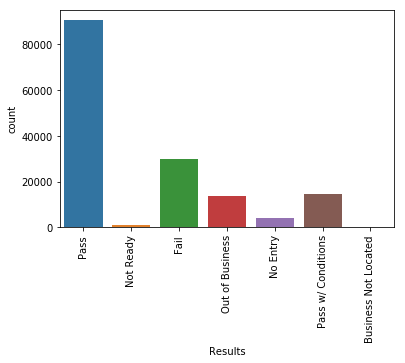

In [20]:
#Plotting the bar graph for the results

sns.countplot(data['Results'])
plt.xticks(rotation=90)

In [21]:
#Combining into fail and pass
data['Results'].replace(to_replace = 'Pass w/ Conditions',value='Pass',inplace=True)

In [22]:
#Converting all the categories of results in either pass or fail
for i in range(0,len(data['Results'])):
    if data.loc[i,'Results']!='Pass':
        data.loc[i,'Results']='Fail'

In [23]:
data.head()

,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Results,Violations,Latitude,Longitude,Location
0,2079132,MARRIOT MARQUIS CHICAGO,MARRIOT MARQUIS CHICAGO,2517328.0,Restaurant,Risk 1 (High),2121 S PRAIRIE AVE,CHICAGO,IL,60616.0,08/28/2017,License,Pass,NaN,41.853651,-87.620534,"(41.853650885040594, -87.62053358114167)"
1,2079129,JET'S PIZZA,JET'S PIZZA,2522268.0,Restaurant,Risk 2 (Medium),1025 W MADISON ST,CHICAGO,IL,60607.0,08/28/2017,License,Fail,NaN,41.881572,-87.653052,"(41.88157249576794, -87.65305233593274)"
2,2079125,ROOM 1520,ROOM 1520,2446638.0,Special Event,Risk 3 (Low),301 N JUSTINE ST,CHICAGO,IL,60607.0,08/28/2017,License Re-Inspection,Fail,8. SANITIZING RINSE FOR EQUIPMENT AND UTENSILS...,41.886577,-87.665328,"(41.88657652150854, -87.66532812140231)"
3,2079123,MARRIOT MARQUIS CHICAGO,MARRIOT MARQUIS CHICAGO,2517338.0,Restaurant,Risk 1 (High),2121 S PRAIRIE AVE,CHICAGO,IL,60616.0,08/28/2017,License,Pass,"35. WALLS, CEILINGS, ATTACHED EQUIPMENT CONSTR...",41.853651,-87.620534,"(41.853650885040594, -87.62053358114167)"
4,2079105,CHARTWELLS,CICS WEST BELDEN CAMPUS,2549079.0,CHARTER SCHOOL,Risk 1 (High),2245 N MCVICKER AVE,CHICAGO,IL,60639.0,08/28/2017,License Re-Inspection,Pass,18. NO EVIDENCE OF RODENT OR INSECT OUTER OPEN...,41.921675,-87.776711,"(41.921675488910864, -87.7767113569357)"


In [24]:
#Getting the null values in Risk column

for i in range(0,len(data['Results'])):
    if (pd.isna(data.loc[i,'Risk'])) & (data.loc[i,'Results']=='Pass'):
        data.loc[i,'Risk']='Risk 3 (Low)'
    

In [26]:
data.isnull().sum()

Inspection ID          0
DBA Name               0
AKA Name            2543
License #             15
Facility Type       4560
Risk                  54
Address                0
City                   0
State                  0
Zip                   98
Inspection Date        0
Inspection Type        1
Results                0
Violations         30798
Latitude               0
Longitude              0
Location             544
dtype: int64

In [27]:
for i in range(0,len(data['Results'])):
    if (pd.isna(data.loc[i,'Risk'])) & (data.loc[i,'Results']=='Fail'):
        data.loc[i,'Risk']='Risk 1 (High)'

In [28]:
#Treating the Inspection Date column
data['Inspection Date'] = data['Inspection Date'].apply(lambda x: x.split('/')[2]).astype(int)

In [29]:
data.head()

,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Results,Violations,Latitude,Longitude,Location
0,2079132,MARRIOT MARQUIS CHICAGO,MARRIOT MARQUIS CHICAGO,2517328.0,Restaurant,Risk 1 (High),2121 S PRAIRIE AVE,CHICAGO,IL,60616.0,2017,License,Pass,NaN,41.853651,-87.620534,"(41.853650885040594, -87.62053358114167)"
1,2079129,JET'S PIZZA,JET'S PIZZA,2522268.0,Restaurant,Risk 2 (Medium),1025 W MADISON ST,CHICAGO,IL,60607.0,2017,License,Fail,NaN,41.881572,-87.653052,"(41.88157249576794, -87.65305233593274)"
2,2079125,ROOM 1520,ROOM 1520,2446638.0,Special Event,Risk 3 (Low),301 N JUSTINE ST,CHICAGO,IL,60607.0,2017,License Re-Inspection,Fail,8. SANITIZING RINSE FOR EQUIPMENT AND UTENSILS...,41.886577,-87.665328,"(41.88657652150854, -87.66532812140231)"
3,2079123,MARRIOT MARQUIS CHICAGO,MARRIOT MARQUIS CHICAGO,2517338.0,Restaurant,Risk 1 (High),2121 S PRAIRIE AVE,CHICAGO,IL,60616.0,2017,License,Pass,"35. WALLS, CEILINGS, ATTACHED EQUIPMENT CONSTR...",41.853651,-87.620534,"(41.853650885040594, -87.62053358114167)"
4,2079105,CHARTWELLS,CICS WEST BELDEN CAMPUS,2549079.0,CHARTER SCHOOL,Risk 1 (High),2245 N MCVICKER AVE,CHICAGO,IL,60639.0,2017,License Re-Inspection,Pass,18. NO EVIDENCE OF RODENT OR INSECT OUTER OPEN...,41.921675,-87.776711,"(41.921675488910864, -87.7767113569357)"


In [30]:
#Facility of each type
#since Restaurant and Grocery Store occypu 80%, we can categorise
data['Facility Type'].value_counts(True)

Restaurant                                         0.678258
Grocery Store                                      0.137695
School                                             0.064670
Daycare (2 - 6 Years)                              0.016034
Bakery                                             0.015062
Children's Services Facility                       0.011417
Daycare Above and Under 2 Years                    0.011296
Long Term Care                                     0.006070
Catering                                           0.005930
Mobile Food Dispenser                              0.005253
Daycare Combo 1586                                 0.005092
Liquor                                             0.004911
Wholesale                                          0.003424
Golden Diner                                       0.002874
Mobile Food Preparer                               0.002600
Hospital                                           0.002559
TAVERN                                  

In [31]:
#Filling the null values with 'reataurant' in Facility Type
data['Facility Type'].fillna(value='Restaurant',inplace=True)

In [32]:
data['Facility Type'].value_counts(True)

Restaurant                                         0.687797
Grocery Store                                      0.133613
School                                             0.062753
Daycare (2 - 6 Years)                              0.015558
Bakery                                             0.014615
Children's Services Facility                       0.011079
Daycare Above and Under 2 Years                    0.010962
Long Term Care                                     0.005890
Catering                                           0.005754
Mobile Food Dispenser                              0.005097
Daycare Combo 1586                                 0.004941
Liquor                                             0.004766
Wholesale                                          0.003322
Golden Diner                                       0.002789
Mobile Food Preparer                               0.002523
Hospital                                           0.002484
TAVERN                                  

In [33]:
#data Engineering
for i in range(0,len(data['Facility Type'])):
    if (data.loc[i,'Facility Type']!='Restaurant') & (data.loc[i,'Facility Type'] !='Others') & (data.loc[i,'Facility Type']!='Grocery Store'):
        data.loc[i,'Facility Type']='OTHERS'

In [34]:
data.head()

,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Results,Violations,Latitude,Longitude,Location
0,2079132,MARRIOT MARQUIS CHICAGO,MARRIOT MARQUIS CHICAGO,2517328.0,Restaurant,Risk 1 (High),2121 S PRAIRIE AVE,CHICAGO,IL,60616.0,2017,License,Pass,NaN,41.853651,-87.620534,"(41.853650885040594, -87.62053358114167)"
1,2079129,JET'S PIZZA,JET'S PIZZA,2522268.0,Restaurant,Risk 2 (Medium),1025 W MADISON ST,CHICAGO,IL,60607.0,2017,License,Fail,NaN,41.881572,-87.653052,"(41.88157249576794, -87.65305233593274)"
2,2079125,ROOM 1520,ROOM 1520,2446638.0,OTHERS,Risk 3 (Low),301 N JUSTINE ST,CHICAGO,IL,60607.0,2017,License Re-Inspection,Fail,8. SANITIZING RINSE FOR EQUIPMENT AND UTENSILS...,41.886577,-87.665328,"(41.88657652150854, -87.66532812140231)"
3,2079123,MARRIOT MARQUIS CHICAGO,MARRIOT MARQUIS CHICAGO,2517338.0,Restaurant,Risk 1 (High),2121 S PRAIRIE AVE,CHICAGO,IL,60616.0,2017,License,Pass,"35. WALLS, CEILINGS, ATTACHED EQUIPMENT CONSTR...",41.853651,-87.620534,"(41.853650885040594, -87.62053358114167)"
4,2079105,CHARTWELLS,CICS WEST BELDEN CAMPUS,2549079.0,OTHERS,Risk 1 (High),2245 N MCVICKER AVE,CHICAGO,IL,60639.0,2017,License Re-Inspection,Pass,18. NO EVIDENCE OF RODENT OR INSECT OUTER OPEN...,41.921675,-87.776711,"(41.921675488910864, -87.7767113569357)"


In [35]:
data['Inspection Type'].value_counts(True)

Canvass                                     0.531256
License                                     0.128731
Canvass Re-Inspection                       0.101555
Complaint                                   0.090352
License Re-Inspection                       0.046993
Short Form Complaint                        0.037436
Complaint Re-Inspection                     0.036701
Suspected Food Poisoning                    0.004564
Consultation                                0.004317
License-Task Force                          0.003933
Tag Removal                                 0.003920
Out of Business                             0.001846
Task Force Liquor 1475                      0.001651
Recent Inspection                           0.001333
Suspected Food Poisoning Re-inspection      0.001047
Complaint-Fire                              0.001047
Short Form Fire-Complaint                   0.000735
Special Events (Festivals)                  0.000403
No Entry                                    0.

In [36]:
data['City'].value_counts()

CHICAGO         153655
OTHER CITIES       155
Name: City, dtype: int64

In [37]:
data['Facility Type'].value_counts()

Restaurant       105790
OTHERS            27469
Grocery Store     20551
Name: Facility Type, dtype: int64

In [39]:
#Data Engineering
for i in range(0,len(data['Inspection Type'])):
    if (data.loc[i,'Inspection Type']!='Canvass') & (data.loc[i,'Inspection Type'] !='License') & (data.loc[i,'Inspection Type']!='Canvass Re-Inspection'):
        data.loc[i,'Inspection Type']='OTHER COMPLAINTS'

In [40]:
data['Facility Type'].value_counts()

Restaurant       105790
OTHERS            27469
Grocery Store     20551
Name: Facility Type, dtype: int64

In [41]:
data.head()

,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Results,Violations,Latitude,Longitude,Location
0,2079132,MARRIOT MARQUIS CHICAGO,MARRIOT MARQUIS CHICAGO,2517328.0,Restaurant,Risk 1 (High),2121 S PRAIRIE AVE,CHICAGO,IL,60616.0,2017,License,Pass,NaN,41.853651,-87.620534,"(41.853650885040594, -87.62053358114167)"
1,2079129,JET'S PIZZA,JET'S PIZZA,2522268.0,Restaurant,Risk 2 (Medium),1025 W MADISON ST,CHICAGO,IL,60607.0,2017,License,Fail,NaN,41.881572,-87.653052,"(41.88157249576794, -87.65305233593274)"
2,2079125,ROOM 1520,ROOM 1520,2446638.0,OTHERS,Risk 3 (Low),301 N JUSTINE ST,CHICAGO,IL,60607.0,2017,OTHER COMPLAINTS,Fail,8. SANITIZING RINSE FOR EQUIPMENT AND UTENSILS...,41.886577,-87.665328,"(41.88657652150854, -87.66532812140231)"
3,2079123,MARRIOT MARQUIS CHICAGO,MARRIOT MARQUIS CHICAGO,2517338.0,Restaurant,Risk 1 (High),2121 S PRAIRIE AVE,CHICAGO,IL,60616.0,2017,License,Pass,"35. WALLS, CEILINGS, ATTACHED EQUIPMENT CONSTR...",41.853651,-87.620534,"(41.853650885040594, -87.62053358114167)"
4,2079105,CHARTWELLS,CICS WEST BELDEN CAMPUS,2549079.0,OTHERS,Risk 1 (High),2245 N MCVICKER AVE,CHICAGO,IL,60639.0,2017,OTHER COMPLAINTS,Pass,18. NO EVIDENCE OF RODENT OR INSECT OUTER OPEN...,41.921675,-87.776711,"(41.921675488910864, -87.7767113569357)"


In [42]:
#Dropping the columns
data.drop(['DBA Name','AKA Name','License #','Address','Zip','Violations','Latitude','Longitude','Location'],axis=1,inplace=True)

In [51]:
data.head()

,Facility Type,Risk,City,Inspection Type,Results,Years to inspection
0,Restaurant,Risk 1 (High),CHICAGO,License,Pass,0
1,Restaurant,Risk 2 (Medium),CHICAGO,License,Fail,0
2,OTHERS,Risk 3 (Low),CHICAGO,OTHER COMPLAINTS,Fail,0
3,Restaurant,Risk 1 (High),CHICAGO,License,Pass,0
4,OTHERS,Risk 1 (High),CHICAGO,OTHER COMPLAINTS,Pass,0


In [52]:
data.head()

,Facility Type,Risk,City,Inspection Type,Results,Years to inspection
0,Restaurant,Risk 1 (High),CHICAGO,License,Pass,0
1,Restaurant,Risk 2 (Medium),CHICAGO,License,Fail,0
2,OTHERS,Risk 3 (Low),CHICAGO,OTHER COMPLAINTS,Fail,0
3,Restaurant,Risk 1 (High),CHICAGO,License,Pass,0
4,OTHERS,Risk 1 (High),CHICAGO,OTHER COMPLAINTS,Pass,0


In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153810 entries, 0 to 153809
Data columns (total 6 columns):
Facility Type          153810 non-null object
Risk                   153810 non-null object
City                   153810 non-null object
Inspection Type        153810 non-null object
Results                153810 non-null object
Years to inspection    153810 non-null int32
dtypes: int32(1), object(5)
memory usage: 6.5+ MB


In [ ]:
data['Inspection Type'].value_counts()

In [54]:
x = data.drop('Results',axis=1)
y = data['Results']

In [55]:
x_categorical = x.select_dtypes(include =['object'])
x_categorical.head()

,Facility Type,Risk,City,Inspection Type
0,Restaurant,Risk 1 (High),CHICAGO,License
1,Restaurant,Risk 2 (Medium),CHICAGO,License
2,OTHERS,Risk 3 (Low),CHICAGO,OTHER COMPLAINTS
3,Restaurant,Risk 1 (High),CHICAGO,License
4,OTHERS,Risk 1 (High),CHICAGO,OTHER COMPLAINTS


In [56]:
#Creating dummies
dummies = pd.get_dummies(x_categorical)
dummies.head()

,Facility Type_Grocery Store,Facility Type_OTHERS,Facility Type_Restaurant,Risk_All,Risk_Risk 1 (High),Risk_Risk 2 (Medium),Risk_Risk 3 (Low),City_CHICAGO,City_OTHER CITIES,Inspection Type_Canvass,Inspection Type_Canvass Re-Inspection,Inspection Type_License,Inspection Type_OTHER COMPLAINTS
0,0,0,1,0,1,0,0,1,0,0,0,1,0
1,0,0,1,0,0,1,0,1,0,0,0,1,0
2,0,1,0,0,0,0,1,1,0,0,0,0,1
3,0,0,1,0,1,0,0,1,0,0,0,1,0
4,0,1,0,0,1,0,0,1,0,0,0,0,1


In [57]:
data_ = data.drop(list(x_categorical.columns),axis=1)

In [58]:
data_new = pd.concat([data_,dummies],axis=1)

In [59]:
data_new.head()

,Results,Years to inspection,Facility Type_Grocery Store,Facility Type_OTHERS,Facility Type_Restaurant,Risk_All,Risk_Risk 1 (High),Risk_Risk 2 (Medium),Risk_Risk 3 (Low),City_CHICAGO,City_OTHER CITIES,Inspection Type_Canvass,Inspection Type_Canvass Re-Inspection,Inspection Type_License,Inspection Type_OTHER COMPLAINTS
0,Pass,0,0,0,1,0,1,0,0,1,0,0,0,1,0
1,Fail,0,0,0,1,0,0,1,0,1,0,0,0,1,0
2,Fail,0,0,1,0,0,0,0,1,1,0,0,0,0,1
3,Pass,0,0,0,1,0,1,0,0,1,0,0,0,1,0
4,Pass,0,0,1,0,0,1,0,0,1,0,0,0,0,1


In [60]:
#Splitting the data in train and test

x = data_new.drop('Results',axis=1)
y = data_new['Results']
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=1)

In [62]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier()
model_1 = knn.fit(xtrain,ytrain)
pred_1 = model_1.predict(xtest)

In [64]:
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score
print(accuracy_score(pred_1,ytest))
print(confusion_matrix(pred_1,ytest))

0.6610753527078863
[[ 4555  5561]
 [10078 25949]]


In [65]:
#Random Forest

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
model_2 = rf.fit(xtrain,ytrain)
pred_2 = model_2.predict(xtest)
print(accuracy_score(pred_2,ytest))
print(confusion_matrix(pred_2,ytest))

0.7096634375744967
[[ 2066   830]
 [12567 30680]]


In [66]:
#Bagging Classifier
from sklearn.ensemble import BaggingClassifier
bg = BaggingClassifier()
model_3 = bg.fit(xtrain,ytrain)
pred_3 = model_3.predict(xtest)
print(accuracy_score(pred_3,ytest))
print(confusion_matrix(pred_3,ytest))

0.7087965671932904
[[ 1874   678]
 [12759 30832]]


In [68]:
#Logistic Regression

from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()
model_4 = lg.fit(xtrain,ytrain)
pred_4 = model_4.predict(xtest)
print(accuracy_score(pred_4,ytest))
print(confusion_matrix(pred_4,ytest))

0.7007346726480723
[[ 1920  1096]
 [12713 30414]]


In [70]:
#Decision tree classifier

from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier(criterion = 'entropy')
model_5 = dtree.fit(xtrain,ytrain)
pred_5 = model_5.predict(xtest)
print(accuracy_score(pred_5,ytest))
print(confusion_matrix(pred_5,ytest))

0.7091649871053031
[[ 1942   729]
 [12691 30781]]


In [81]:
#Adaboost Classifier

from sklearn.ensemble import AdaBoostClassifier
ad=AdaBoostClassifier()
model_6 = ad.fit(xtrain,ytrain)
pred_6 = model_6.predict(xtest)
print(accuracy_score(pred_6,ytest))
print(confusion_matrix(pred_6,ytest))

0.7007346726480723
[[ 1920  1096]
 [12713 30414]]


In [84]:
#gradientBoostingClassifier

from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
model_7=gb.fit(xtrain,ytrain)
pred_7 = model_7.predict(xtest)
print(accuracy_score(pred_7,ytest))
print(confusion_matrix(pred_7,ytest))

0.7089699412695317
[[ 2026   822]
 [12607 30688]]
